# Проект: анализ бизнес-показателей

В этом проекте необходимы проанализировать логи сервера с данными о посещениях пользователей развлекательного приложения. С их помощью изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей. Для того, чтобы сделать верные выводы также необходимо проанализировать статистику расходов на рекламу.


## Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

***

## Загрузка данных и их подготовка к анализу

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import cm
import plotly.express as px
import numpy as np

# Настройка общего вида графиков seaborn
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

In [2]:
#Импорт входных данных
try:
    df_visits = pd.read_csv('/datasets/visits_info_short.csv')
    df_orders = pd.read_csv('/datasets/orders_info_short.csv')
    df_costs = pd.read_csv('/datasets/costs_info_short.csv')
    
except FileNotFoundError:
    df_visits = pd.read_csv('visits_info_short.csv')
    df_orders = pd.read_csv('orders_info_short.csv')
    df_costs = pd.read_csv('costs_info_short.csv')

#поменяем вывод float значений
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Напишем стандартную функцию общего обзора данных.

In [3]:
# Функция вывода красивых таблиц
def nice_display(data, rows_num):
    print(f"Первые {rows_num} строк таблицы".center(127, "-"))
    display(data.head(rows_num).style.set_table_styles(
        [{'selector': 'tr:nth-of-type(odd)',
          'props': [('background', '#eee')]},
         {'selector': 'tr:nth-of-type(even)',
            'props': [('background', 'white')]},
            {'selector': 'th',
             'props': [('background', '#2DA679'),
                       ('color', 'white'),
                       ('font-family', 'verdana')]},
            {'selector': 'td',
             'props': [('font-family', 'verdana')]},
         ]
    ).hide_index())

In [4]:
# Стандартная функция общего обзора данных
def data_view(data):
    print("Общая структура данных".center(127, "-") + '\n')
    display(data.info())
    print(127 * '-' + '\n')
    print("Первые 10 строк таблицы".center(127, "-"))
    display(data.head(10).style.set_table_styles(
        [{'selector': 'tr:nth-of-type(odd)',
          'props': [('background', '#eee')]},
         {'selector': 'tr:nth-of-type(even)',
            'props': [('background', 'white')]},
            {'selector': 'th',
             'props': [('background', '#2DA679'),
                       ('color', 'white'),
                       ('font-family', 'verdana')]},
            {'selector': 'td',
             'props': [('font-family', 'verdana')]},
         ]
    ).hide_index())
    print(127 * '-' + '\n')
    print("Доля пропущенных значений по столбцам в таблице".center(127, "-"))
    display(data.isna().mean().sort_values(ascending=False))
    print(127 * '-' + '\n')
    print('Визуализируем пропущенные значения графиком'.center(127, "-"))
    sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap="YlGnBu");
    plt.show()
    print(127 * '-' + '\n')
    print(f"Количество полных дубликатов: {data.duplicated().sum()}\n")
    print(127 * '-' + '\n')
    print("Статистическая информация о числовых данных".center(127, "-"))
    display(data.describe())
    print(127 * '-' + '\n')

### Таблица `visits`

#### Обзор таблицы `visits`

-----------------------------------------------------Общая структура данных----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------Доля пропущенных значений по столбцам в таблице----------------------------------------


User Id         0.00000
Region          0.00000
Device          0.00000
Channel         0.00000
Session Start   0.00000
Session End     0.00000
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Визуализируем пропущенные значения графиком------------------------------------------


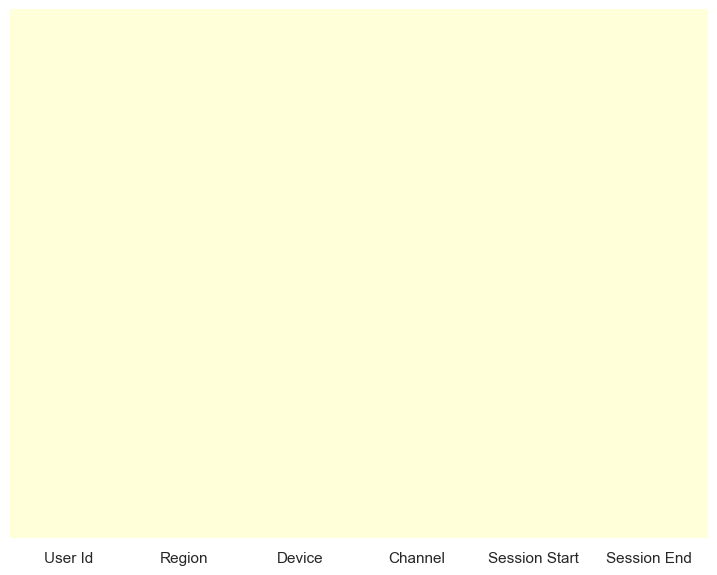

-------------------------------------------------------------------------------------------------------------------------------

Количество полных дубликатов: 0

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Статистическая информация о числовых данных------------------------------------------


User Id
count       309901.00000
mean  499766449382.70306
std   288789916887.83075
min         599326.00000
25%   249369122776.00000
50%   498990589687.00000
75%   749521111616.00000
max   999999563947.00000

-------------------------------------------------------------------------------------------------------------------------------



In [5]:
data_view(df_visits)

#### Предобработка таблицы `visits`

В таблице `visits` названия столбцов написаны с нарушением стиля - лучше будем использовать "змеиный регистр". Для этого переименуем названия столбцов

In [6]:
df_visits = df_visits.rename(columns={
                             'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 'Channel': 'channel',
                            'Session Start': 'session_start', 'Session End': 'session_end'})

In [7]:
df_visits.columns =df_visits.columns.str.lower().str.replace(' ', '_')

Проверим новые названия столбцов.

In [8]:
df_visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Также имеет смысл привести тип данных столбцов `session_start` и `session_end` к типу `datetime` для удобства дальнейших расчетов.

In [9]:
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])

Проверим типы данных.

In [10]:
df_visits.dtypes

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

Выведем максимальную и минимальную дату датасета для проверки актуальности значений дат.

In [11]:
print(f'Минимальное и максимальное время начала сессии в таблице visits: {df_visits["session_start"].min()};'
      f' {df_visits["session_start"].max()}',
      f'\nМинимальное и максимальное время окончания сессии в таблице visits: {df_visits["session_end"].min()};'
      f' {df_visits["session_end"].max()}')

Минимальное и максимальное время начала сессии в таблице visits: 2019-05-01 00:00:41; 2019-10-31 23:59:23 
Минимальное и максимальное время окончания сессии в таблице visits: 2019-05-01 00:07:06; 2019-11-01 01:38:46


Проверим, что в данных нет ошибок: посчитаем разницу между концом и началом сессии, проверим, что нет отрицательных значений.

In [12]:
session_length = df_visits['session_end'] - df_visits['session_start']
session_length.describe()

count                       309901
mean     0 days 00:30:00.090867728
std      0 days 00:30:03.063524541
min                0 days 00:00:00
25%                0 days 00:08:37
50%                0 days 00:20:44
75%                0 days 00:41:37
max                0 days 06:10:57
dtype: object

Длина сессии всегда больше 0 - отлично.

### Таблица `orders`

#### Обзор таблицы `orders`

In [13]:
data_view(df_orders)

-----------------------------------------------------Общая структура данных----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------Доля пропущенных значений по столбцам в таблице----------------------------------------


User Id    0.00000
Event Dt   0.00000
Revenue    0.00000
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Визуализируем пропущенные значения графиком------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------

Количество полных дубликатов: 0

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Статистическая информация о числовых данных------------------------------------------


User Id     Revenue
count        40212.00000 40212.00000
mean  499029531203.23016     5.37061
std   286093675967.16742     3.45421
min         599326.00000     4.99000
25%   251132440436.75000     4.99000
50%   498283972665.00000     4.99000
75%   743332711780.00000     4.99000
max   999895427370.00000    49.99000

-------------------------------------------------------------------------------------------------------------------------------



#### Предобработка таблицы `orders`

В таблице `orders` названия столбцов также написаны с нарушением стиля - лучше будем использовать "змеиный регистр". Для этого переименуем названия столбцов.

In [14]:
df_orders.columns =df_orders.columns.str.lower().str.replace(' ', '_')

Проверим новые названия столбцов.

In [15]:
df_orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

Также имеет смысл привести тип данных столбца `event_dt` к типу `datetime` для удобства дальнейших расчетов.

In [16]:
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])

Проверим типы данных.

In [17]:
df_orders.dtypes

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

Выведем максимальную и минимальную дату датасета для проверки актуальности значений дат.

In [18]:
print(f'Минимальное время в таблице orders {df_orders["event_dt"].min()}',
     f'\nМаксимальное время в таблице orders {df_orders["event_dt"].max()}')

Минимальное время в таблице orders 2019-05-01 00:28:11 
Максимальное время в таблице orders 2019-10-31 23:56:56


### Таблица `costs`

#### Обзор таблицы `costs`

-----------------------------------------------------Общая структура данных----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


-------------------------------------------------------------------------------------------------------------------------------

----------------------------------------Доля пропущенных значений по столбцам в таблице----------------------------------------


dt        0.00000
Channel   0.00000
costs     0.00000
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Визуализируем пропущенные значения графиком------------------------------------------


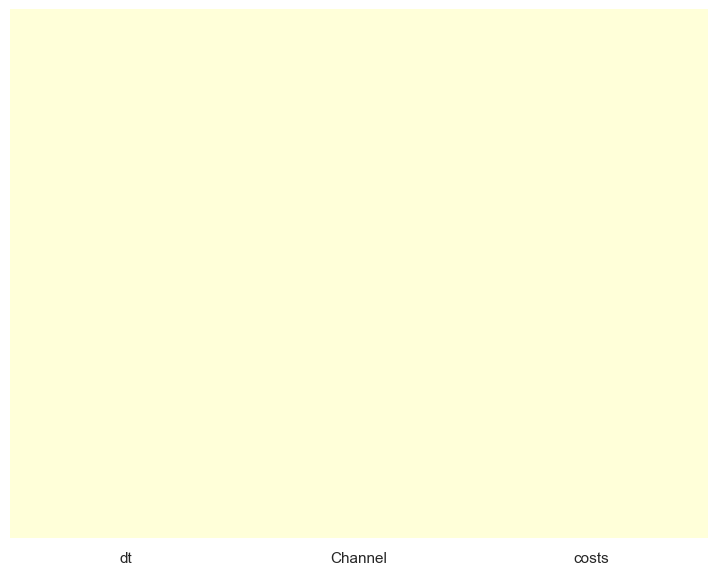

-------------------------------------------------------------------------------------------------------------------------------

Количество полных дубликатов: 0

-------------------------------------------------------------------------------------------------------------------------------

------------------------------------------Статистическая информация о числовых данных------------------------------------------


costs
count 1800.00000
mean    58.60961
std    107.74022
min      0.80000
25%      6.49500
50%     12.28500
75%     33.60000
max    630.00000

-------------------------------------------------------------------------------------------------------------------------------



In [19]:
data_view(df_costs)

#### Предобработка таблицы `costs`

В таблице `costs` некоторые названия столбцов также написаны с нарушением стиля - лучше будем использовать "змеиный регистр". Для этого переименуем названия столбцов.

In [20]:
df_costs = df_costs.rename(columns={
                             'Channel': 'channel'})

Проверим новые названия столбцов.

In [21]:
df_costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

Также имеет смысл привести тип данных столбца `dt` к типу `datetime` для удобства дальнейших расчетов.

In [22]:
df_costs['dt'] = pd.to_datetime(df_costs['dt']).dt.date

Проверим типы данных.

In [23]:
df_costs.dtypes

dt          object
channel     object
costs      float64
dtype: object

Выведем максимальную и минимальную дату датасета для проверки актуальности значений дат.

In [24]:
print(f'Минимальное время в таблице costs {df_costs["dt"].min()}',
     f'\nМаксимальное время в таблице costs {df_costs["dt"].max()}')

Минимальное время в таблице costs 2019-05-01 
Максимальное время в таблице costs 2019-10-27


### Создание таблицы профилей пользователя из таблицы `visits` и `orders`

Для дальнейшего анализа нам нужно составить таблицу профилей пользователя со следующими значениями:
* `user_id` - уникальный идентификатор пользователя;
* `first_ts` - дата первого посещения;
* `channel` - источник перехода;
* `device` - идентификатор устройства;
* `region` - регион пользователя;
* `dt` - дата первого посещения;
* `month` - первый день месяца первого посещения;
* `payer` - признак, который принимает значение `True`, если идентификатор пользователя есть среди покупателей.

Напишем функцию создания таблицы профилей.

In [25]:
def get_profiles(sessions, orders):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]').dt.date
    
    # проверка, есть ли ID пользователей из profiles в orders
    profiles['payer'] =  profiles['user_id'].isin(orders['user_id'].unique())

    return profiles

Создадим таблицу профилей.

In [26]:
df_profiles = get_profiles(df_visits, df_orders)
nice_display(df_profiles, 10)

----------------------------------------------------Первые 10 строк таблицы----------------------------------------------------


### Вывод

В этом шаге мы загрузили и обработали данные:
* Привели названия столбцов во всех таблицах к `змеиному_регистру` для дальнейшего удобства;
* Привели типы данных дат в каждой таблице к типу `datetime`;
* Создали дополнительную таблицу `profiles` из имеющихся данных с уникальным значениями `user_id` и имеющейся информацией по каждому пользователю.

***

## Функции для расчета и анализа LTV, ROI, удержания и конверсии

### Функция расчета удержания

In [27]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция визуализации удержания

In [28]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7, legend_font=11):

    cmap = cm.get_cmap('tab20b') # Colour map
    
    # задаём размер сетки для графиков
    sns.set(rc={'figure.figsize':(11,5)})
    fig, axs = plt.subplots(nrows=1, ncols=2)

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(1, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1, cmap=cmap
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    plt.legend(fontsize=legend_font)

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2, cmap=cmap
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    plt.legend(fontsize=legend_font)
    
    sns.set(rc={'figure.figsize':(11,5)})
    fig, axs = plt.subplots(nrows=1, ncols=2)

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(1, 2, 1)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, cmap=cmap)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.legend(fontsize=legend_font)

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(1, 2, 2, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4, cmap=cmap)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.legend(fontsize=legend_font)

### Функция расчета конверсии

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функции визуализации конверсии

In [30]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7, legend_font=11):
    
    cmap = cm.get_cmap('tab20b') # Colour map
    sns.set(rc={'figure.figsize':(11,6)})
    fig, axs = plt.subplots(nrows=1, ncols=2)

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1, cmap=cmap)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    plt.legend(fontsize=legend_font) 

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, cmap=cmap)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.legend(fontsize=legend_font) 

    plt.tight_layout()
    plt.show()

### Функция расчета LTV и ROI

In [31]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция сглаживания фрейма

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция визуализации LTV и ROI

In [33]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7, legend_font=11):

    cmap = cm.get_cmap('tab20b') # Colour map
        
    # задаём сетку отрисовки графиков
    sns.set(rc={'figure.figsize':(11,5)})
    fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(1, 2, 1)
    ltv.T.plot(grid=True, ax=ax1, cmap=cmap)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    plt.legend(fontsize=legend_font)

    # второй график — динамика ltv
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, cmap=cmap)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    plt.legend(fontsize=legend_font)
    
    sns.set(rc={'figure.figsize':(11, 5)})
    fig, axs = plt.subplots(nrows=1, ncols=2)
    # третий график — динамика cac
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    ax3 = plt.subplot(1, 2, 1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, cmap=cmap)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    plt.legend(fontsize=legend_font)
    
    sns.set(rc={'figure.figsize':(11, 5)})
    fig, axs = plt.subplots(nrows=1, ncols=2)
    # четвёртый график — кривые roi
    ax1 = plt.subplot(1, 2, 1)
    roi.T.plot(grid=True, ax=ax1, cmap=cmap)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    plt.legend(fontsize=7)
    plt.legend(fontsize=legend_font)

    # пятый график — динамика roi
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, cmap=cmap)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.legend(fontsize=legend_font)

### Вывод

В этом шаге мы подготовили вспомогательные функции расчета и визуализации удержания, конверсии, LTV и ROI для удобства дальнейшего анализа.

***

## Исследовательский анализ данных
Проанализируем наши данные, а именно таблицу профилей пользователей. Необходимо понять из каких стран, с каких устройств и из каких каналов привлечения к нам приходят пользователи и пользователи-покупатели.

Определим минимальную и максимальную дату привлечения пользователей. Максимальную дату будем пока рассматривать как момент анализа.

In [34]:
min_analysis_date = df_profiles['dt'].min()
observation_date = df_profiles['dt'].max()  # момент анализа
print(f'Минимальная дата привлечения пользователей: {min_analysis_date}', 
      f'\nМаксимальная дата привлечения пользователей или момент анализа: {observation_date}')

Минимальная дата привлечения пользователей: 2019-05-01 
Максимальная дата привлечения пользователей или момент анализа: 2019-10-27


Минимальная и максимальная дата в таблице профилей соответствует полученному заданию: диапазон дат подходит для необходимого анализа.

### Анализ пользователей по странам

Посмотрим из каких стран приходят посетители и сколько среди них платящих пользователей, посчитаем долю таких пользователей.

In [35]:
profiles_grouped = df_profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).reset_index()
profiles_grouped['ratio'] = profiles_grouped['payer'] / profiles_grouped['user_id'] * 100
profiles_grouped.sort_values(by='user_id', ascending=False)

region  user_id  payer   ratio
3  United States   100002   6902 6.90186
2             UK    17575    700 3.98293
0         France    17450    663 3.79943
1        Germany    14981    616 4.11188

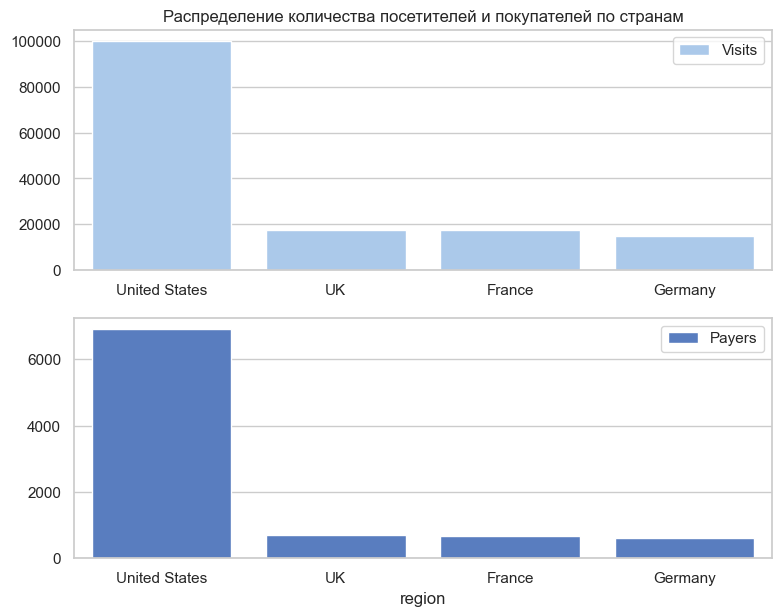

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=1)
sns.barplot(x="region", y="user_id", data=profiles_grouped.sort_values(by='user_id', ascending=False),
            color="b", ax=axs[0], label="Visits").set(
    title='Распределение количества посетителей и покупателей по странам', ylabel=None, xlabel=None);
sns.set_color_codes("muted")
sns.barplot(x="region", y="payer", data=profiles_grouped.sort_values(by='user_id', ascending=False),
            color="b", ax=axs[1], label="Payers").set(ylabel=None)
axs[0].legend(ncol=1, loc="upper right", frameon=True);
axs[1].legend(ncol=1, loc="upper right", frameon=True);
sns.set_color_codes("pastel")

Построим эти графики в виде графиков конверсии и динамики конверсии на 14-й день.

In [37]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    df_profiles, df_orders, observation_date, 14, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, 14) 

По графикам и таблице видно, что больше всего пользователей нашего приложения было привлечено из США. Конверсия у пользователей из США также самая высокая.

### Анализ пользователей по устройствам

Посмотрим какими устройствами пользуются посетители и сколько среди них платящих пользователей.

In [38]:
profiles_grouped = df_profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).reset_index()
profiles_grouped['ratio'] = profiles_grouped['payer'] / profiles_grouped['user_id'] * 100
profiles_grouped.sort_values(by='user_id', ascending=False)

device  user_id  payer   ratio
3   iPhone    54479   3382 6.20790
0  Android    35032   2050 5.85179
2       PC    30455   1537 5.04679
1      Mac    30042   1912 6.36442

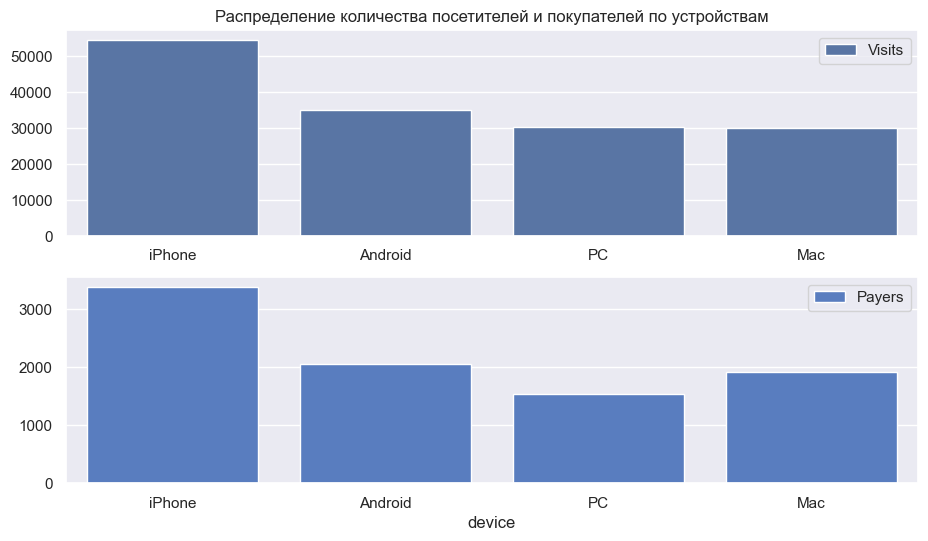

In [39]:
fig, axs = plt.subplots(nrows=2, ncols=1)
sns.barplot(x="device", y="user_id", data=profiles_grouped.sort_values(by='user_id', ascending=False),
            color="b", ax=axs[0], label="Visits").set(
    title='Распределение количества посетителей и покупателей по устройствам', ylabel=None, xlabel=None);
sns.set_color_codes("muted")
sns.barplot(x="device", y="payer", data=profiles_grouped.sort_values(by='user_id', ascending=False),
            color="b", ax=axs[1], label="Payers").set(ylabel=None)
axs[0].legend(ncol=1, loc="upper right", frameon=True);
axs[1].legend(ncol=1, loc="upper right", frameon=True);
sns.set_color_codes("pastel")

Построим эти графики в виде графиков конверсии и динамики конверсии на 14-й день.

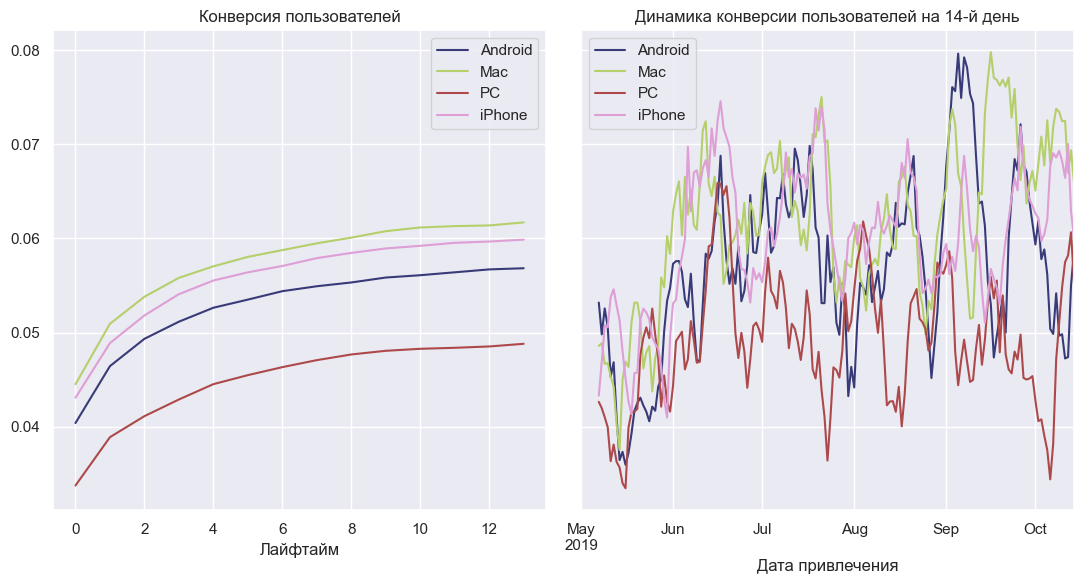

In [40]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    df_profiles, df_orders, observation_date, 14, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, 14) 

По графикам и таблице видно, что больше всего пользователей нашего приложения пользуется iPhone. Конверсия же высокая у Mac, iPhone и Android.

### Анализ пользователей по каналам привлечения

Посмотрим из каких каналов пришло больше всего посетителей и сколько среди них платящих пользователей.

In [41]:
profiles_grouped = df_profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).reset_index()
profiles_grouped['ratio'] = profiles_grouped['payer'] / profiles_grouped['user_id'] * 100
profiles_grouped.sort_values(by='ratio', ascending=False)

channel  user_id  payer    ratio
1             FaceBoom    29144   3557 12.20491
0           AdNonSense     3880    440 11.34021
9       lambdaMediaAds     2149    225 10.46999
6               TipTop    19561   1878  9.60074
5       RocketSuperAds     4448    352  7.91367
7       WahooNetBanner     8553    453  5.29639
8              YRabbit     4312    165  3.82653
3         MediaTornado     4364    156  3.57470
2              LeapBob     8553    262  3.06325
4   OppleCreativeMedia     8605    233  2.70773
10             organic    56439   1160  2.05532

In [42]:
fig, axs = plt.subplots(nrows=2, ncols=1)
sns.barplot(x="user_id", y="channel", data=profiles_grouped.sort_values(by='user_id', ascending=False),
            color="b", ax=axs[0], label="Visits").set(
    title='Распределение количества посетителей и покупателей по каналам привлечения', ylabel=None, xlabel=None);
sns.set_color_codes("muted")
sns.barplot(x="payer", y="channel", data=profiles_grouped.sort_values(by='user_id', ascending=False),
            color="b", ax=axs[1], label="Payers").set(ylabel=None, xlabel='Count')
axs[0].legend(ncol=1, loc="lower right", frameon=True);
axs[1].legend(ncol=1, loc="lower right", frameon=True);
sns.set_color_codes("pastel")

Построим эти графики в виде графиков конверсии и динамики конверсии на 14-й день.

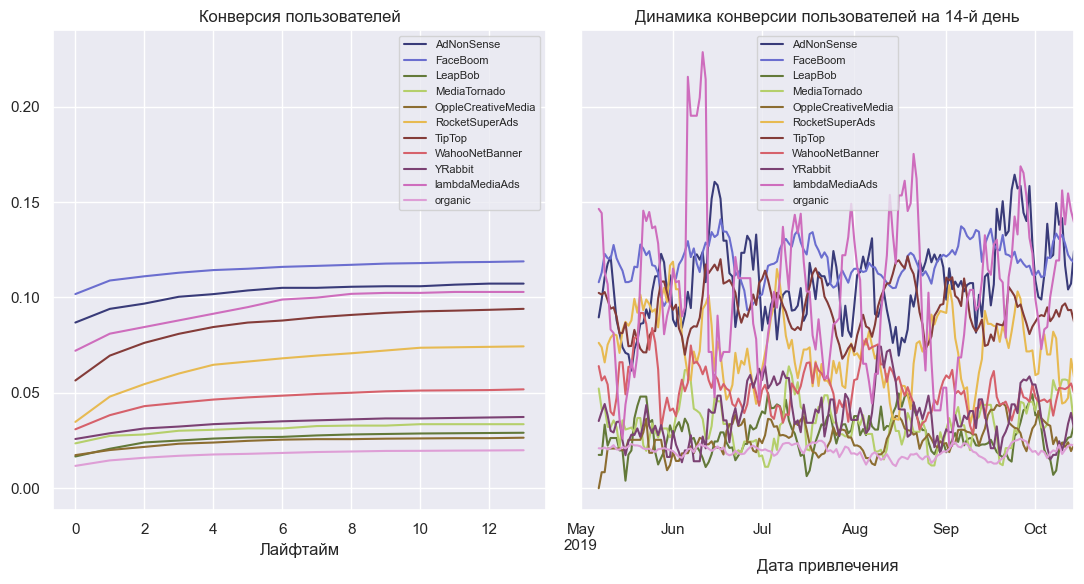

In [43]:
# смотрим конверсию с разбивкой по каналам привлечения

conversion_rсaw, conversion_grouped, conversion_history = get_conversion(
    df_profiles, df_orders, observation_date, 14, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, 14, legend_font=8) 

По графикам и таблице видно, что больше всего пользователей нашего приложения пришли бесплатно (канал Organic). Но конверсия самая высокая у пользователей, пришедших из FaceBoom, AdNonSense и lambdaMediaAds.

### Вывод

В этой части мы проанализировали имеющиеся данные о пользователях, сгруппировали их по странам, устройствам и каналам привлечения, благодаря чему мы смогли посчитать конверсию. Пока можно сказать следующее:
* Больше всего пользователей привлекается в приложение из США, также у них самая высокая конверсия;
* Самое популярное устройство у наших пользователей iPhone, а устройство с самой низкой конверсией - PC;
* Больше всего пользователей находят наше предложение сами (канал Organic), на 2-м месте канал FaceBoom;
* Каналы привлечения с самой высокой конверсией: FaceBoom, AdNonSense и lambdaMediaAds. 

***

## Маркетинг
В этом разделе проанализируем затраты на маркетинг.

### Анализ расходов на маркетинг

Посмотрим на таблицу `costs` с данными по тратам на маркетинг. Выведем общую сумму затрат и сумму затрат на каждый источник.

In [44]:
print(f'Общая сумма расходов на маркетинг составила {df_costs["costs"].sum():.2f}.')

Общая сумма расходов на маркетинг составила 105497.30.


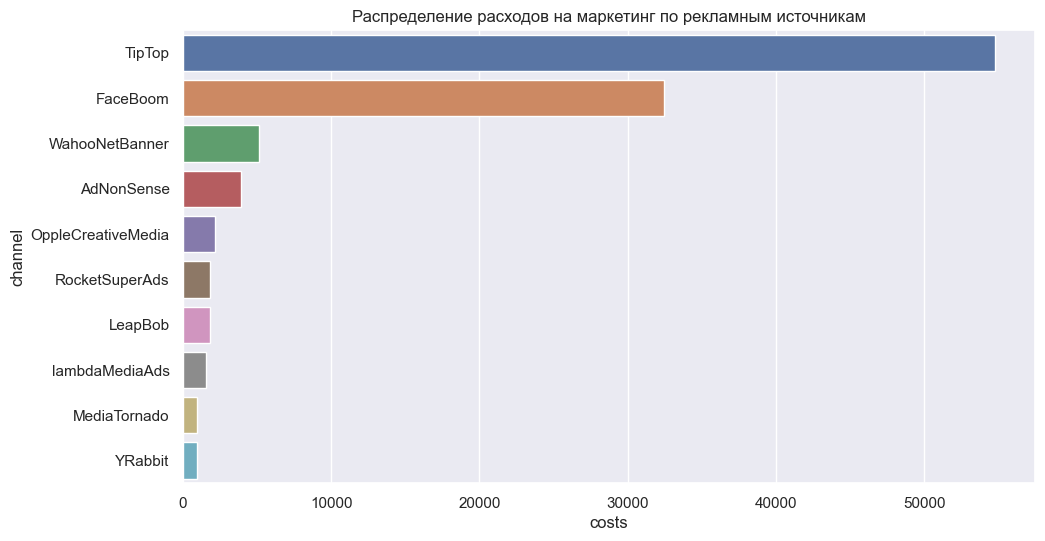

In [45]:
costs_grouped_channel = df_costs.groupby(by='channel').agg(
    {'costs': 'sum'}).reset_index()

#Построим графики общих расходов на источник
sns.barplot(data=costs_grouped_channel.sort_values(by='costs', ascending=False), x='costs',
            y='channel').set(title='Распределение расходов на маркетинг по рекламным источникам');

Также посчитаем расходы по времени. Посмотрим сначала на минимальную и максимальную дату расходов на привлечение пользователей.

In [46]:
min_marketing_date = df_costs['dt'].min()
max_marketing_date = df_costs['dt'].max()
print(f'Минимальная дата расходов на привлечение пользователей: {min_marketing_date}', 
      f'\nМаксимальная дата расходов привлечения пользователей: {max_marketing_date}')

Минимальная дата расходов на привлечение пользователей: 2019-05-01 
Максимальная дата расходов привлечения пользователей: 2019-10-27


Максимальые и минимальные даты расходов на привлечение совпадают с максимальной и минимальной датой самого привлечения пользователей. 

Далее можем оценить общую сумму расходов в зависимости от времени. Построим график с суммой расходов для каждого дня.

In [47]:
costs_grouped_dt = df_costs.groupby(
    by=['dt', 'channel']).agg({'costs': 'sum'}).reset_index()
sns.lineplot(data=costs_grouped_dt, x='dt', y='costs', hue='channel').set(
    title='Сумма расходов на маркетинг в зависимости от времени',
    xlabel=None);

Видим, что, начиная с середины мая, начался рост расходов на привлечение у каналов FaceBoom и TipTop.

Посчитаем общую сумму расходов помесячно. Для этого добавим столбец месяца в таблицу расходов.

In [48]:
df_costs['month'] = pd.to_datetime(df_costs['dt']).dt.to_period('M').dt.to_timestamp()

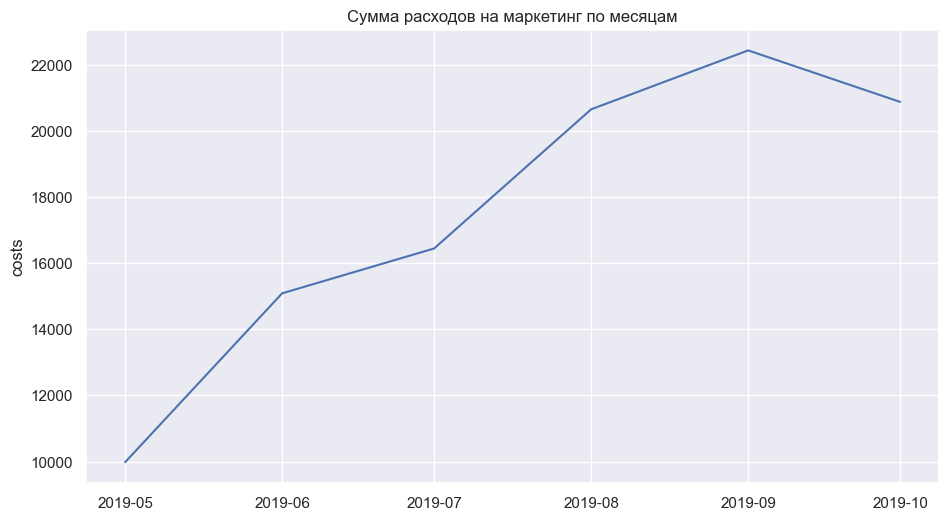

In [49]:
costs_grouped_dt = df_costs.groupby(
    by=['month']).agg({'costs': 'sum'}).reset_index()
sns.lineplot(data=costs_grouped_dt, x='month', y='costs').set(
    title='Сумма расходов на маркетинг по месяцам',
    xlabel=None);

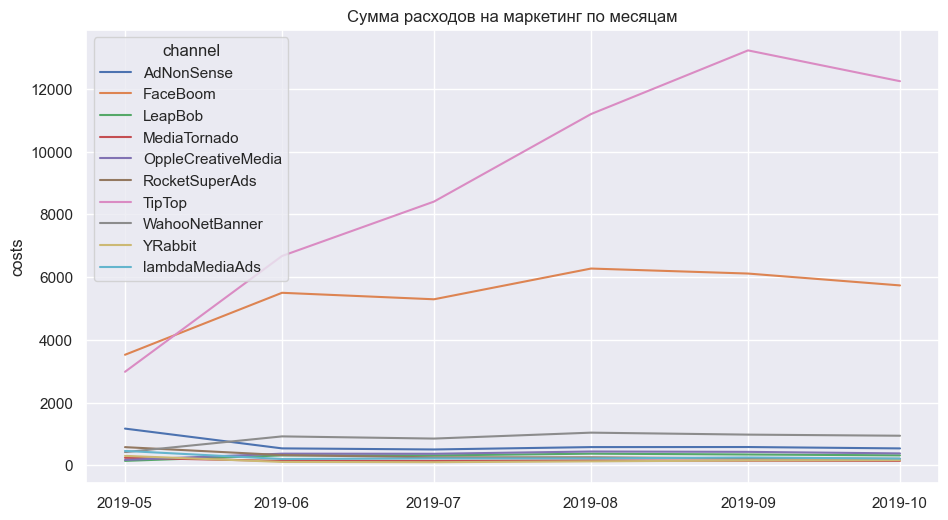

In [50]:
costs_grouped_dt = df_costs.groupby(
    by=['month', 'channel']).agg({'costs': 'sum'}).reset_index()
sns.lineplot(data=costs_grouped_dt, x='month', y='costs', hue='channel').set(
    title='Сумма расходов на маркетинг по месяцам',
    xlabel=None);

### Расчет метрики CAC

Посчитаем средние затраты на привлечение пользователя в зависимости от источника. Для этого добавим в таблицу профилей пользователя информацию о тратах на маркетинг. <br>
Сначала сгруппируем таблицу профилей по дате и каналу привлечения.

In [51]:
profiles_grouped = (
    df_profiles.groupby(['dt', 'channel'])
    .agg({'user_id': 'count'})
    # столбец с числом пользователей назовём unique_users
    .rename(columns={'user_id': 'unique_users'})
    .reset_index()  # возвращаем dt и channel из индексов
)
nice_display(profiles_grouped, 5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


Объединим траты на маркетинг с полученной таблицей. Разделим рекламные расходы в день на количество уникальных пользователей, привлеченных по этому каналу в этот день.

In [52]:
df_costs_merged = df_costs.merge(profiles_grouped, on=['dt', 'channel'], how='left')
df_costs_merged['acquisition_cost'] = df_costs_merged['costs'] / df_costs_merged['unique_users']
nice_display(df_costs_merged,5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


Добавим полученные данные в имеющуюся таблицу профилей, заменив пропущенные NaN значения на 0 (они появятся в канале привлечения Organic - ведь эти пользователи пришли бесплатно).

In [53]:
df_profiles = df_profiles.merge(
    df_costs_merged[['dt', 'channel', 'acquisition_cost']],
    on=['dt', 'channel'],
    how='left',
).fillna(0)
nice_display(df_profiles,5)

-----------------------------------------------------Первые 5 строк таблицы----------------------------------------------------


Посчитаем среднюю стоимость привлечения пользователя в зависимости от канала.

In [54]:
profiles_grouped = df_profiles.groupby(by='channel')['acquisition_cost'].agg('mean')
profiles_grouped.sort_values(ascending=False)

channel
TipTop               2.79900
FaceBoom             1.11329
AdNonSense           1.00805
lambdaMediaAds       0.72480
WahooNetBanner       0.60224
RocketSuperAds       0.41210
OppleCreativeMedia   0.25000
YRabbit              0.21897
MediaTornado         0.21872
LeapBob              0.21017
organic              0.00000
Name: acquisition_cost, dtype: float64

Построим график средней стоимости привлечения для пользователя в зависимости от времени и канала привлечения.

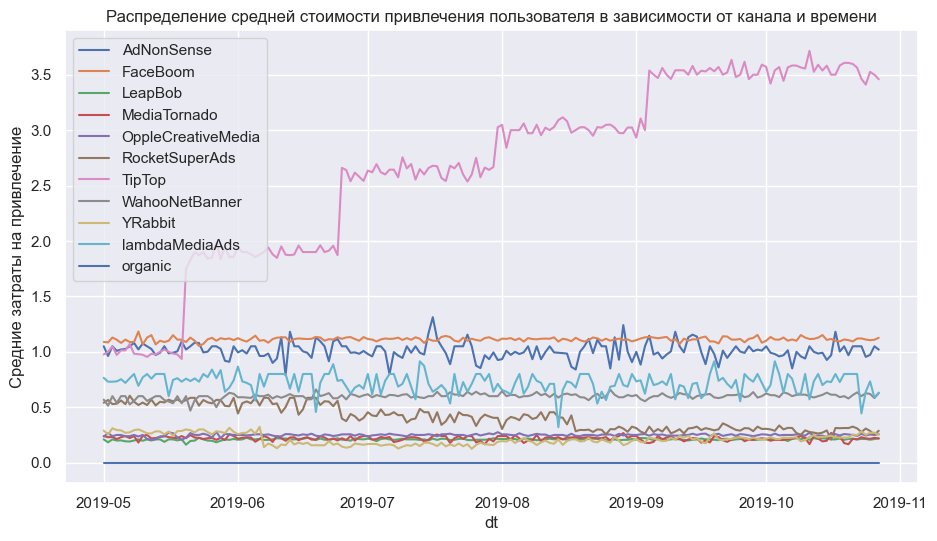

In [55]:
profiles_grouped = df_profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean')
sns.set()
profiles_grouped.plot()
plt.title('Распределение средней стоимости привлечения пользователя в зависимости от канала и времени')
plt.ylabel('Средние затраты на привлечение')
plt.legend(loc='upper left');

По графику видно, что затраты на привлечение пользователей из канала TipTop значительно растут в начале каждого месяца. 

А, несмотря на рост затрат на привлечение у канала FaceBoom, средняя стоимость привлечения не менялась: из этого можно сделать вывод, что рост количества пользователей, привлеченные по этому каналу, был пропорционален тратам. 

Расчитаем средний CAC по всему проекту: для этого разделим общую сумму затрат на количество пользователей.

In [56]:
print(f'Средний CAC на весь проект составил: {df_costs["costs"].sum()/df_profiles["user_id"].count():.2f}')

Средний CAC на весь проект составил: 0.70


### Вывод

В этой части мы проанализировали затраты на маркетинг, расчитали важную метрику CAC (средние затраты на привлечение пользователя) и добавили ее в таблицу профилей. <br>
Из анализа можно сделать следующие выводы:
* Больше всего расходов на привлечение пользователей было у каналов FaceBoom и TipTop;
* Видно, что расходы на привлечение у этих каналов росли с течением времени. Это скорее всего связано с решением маркетингового отдела из-за высокой конверсии у этих каналов (было показано выше);
* Наблюдается стабильный рост средней стоимости привлечения пользователей по каналу TipTop, т.е. несмотря на вложение большого количества денег в продвижение по этому каналу, наше приложение не получило достаточно количества новых пользователей - это также видно из количества новых пользователей, привлеченный по этому каналу;
* Напротив, вложение денег в канал FaceBoom оправдало себя: мы получили пропорциональный рост пользователей, совершивших хотя бы одну покупку.

***

## Оценка окупаемости рекламы для привлечения пользователей

В этом разделе с помощью LTV и ROI необходимо:

- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.

При решении этого шага будем считать, что мы смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

***

### Анализ общей окупаемость рекламы

Расчитаем показатель LTV - `Lifetime Value` и ROI - `Return on Investment` для пользователей. Момент анализа примем 01 ноября 2019. Горизонт анализа примем 14 дней, т.к. согласно условиям окупаемость должна наступать не позже, чем через две недели.

Для расчета окупаемости рекламы уберем из таблицы профилей пользователей с органическим трафиком.

In [57]:
df_profiles = df_profiles.query('channel != "organic"').copy()

In [58]:
# рассчитываем LTV и ROI
observation_date = datetime(2019, 11, 1).date()
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    df_profiles, df_orders, observation_date, 14
)

Чтобы проанилизировать общую окупаемость рекламы построим графики LTV и ROI.

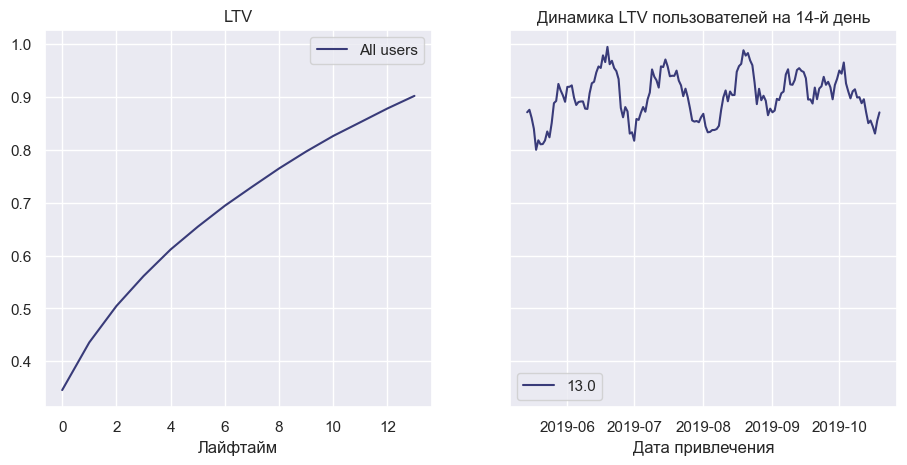

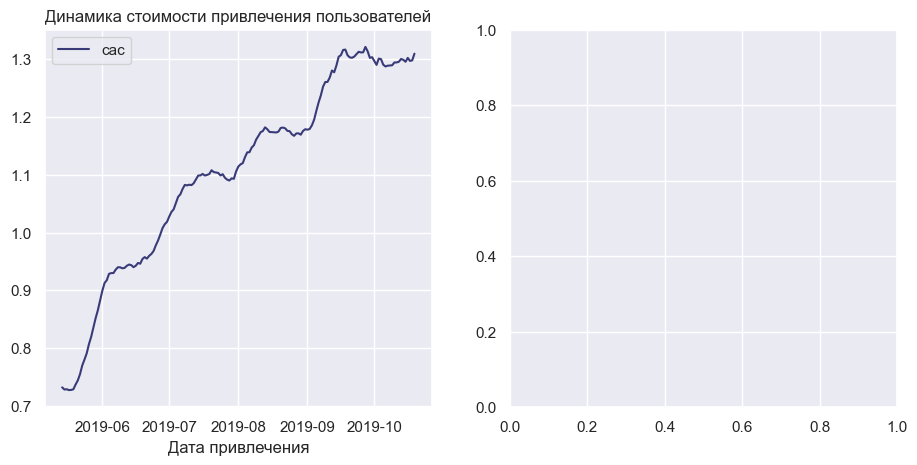

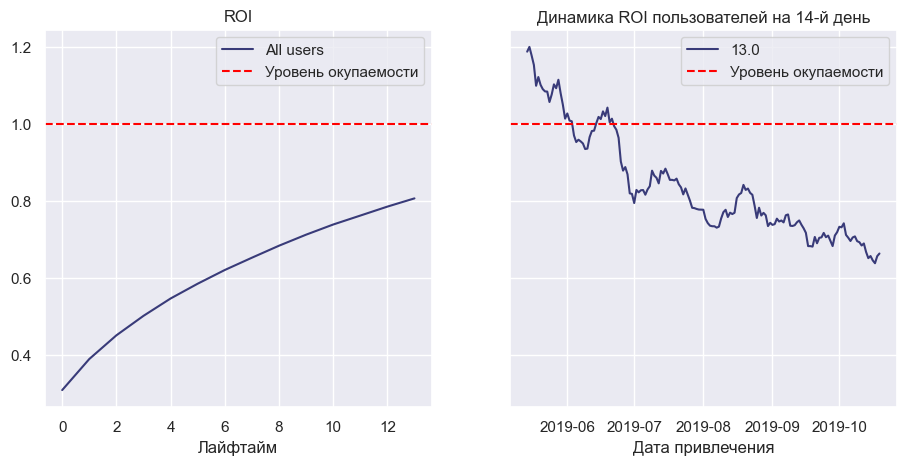

In [59]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14, window=14) 

Мы видим, что 
* Общая окупаемость для лайфтаймов пользователя меньше 14 дней меньше 1, т.е. затраты на привлечение пользователей больше, чем прибыль;
* Затраты на рекламу растут, судя по графику CAC;
* Динамика ROI падает одновременно с ростом CAC, т.е. с ростом трат на маркетинг мы не получаем ожидаемый прирост пользователей;
* Динамика LTV достаточно стабильна.

Для более глубокого анализа разобьем пользователей по доступным группам.  

### Анализ окупаемости рекламы с разбивкой по устройствам

Воспользуемся функциями подсчета LTV и ROI, но добавим дополнительную разбивку по устройствам.

In [60]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    df_profiles, df_orders, observation_date, 14, dimensions=['device']
)

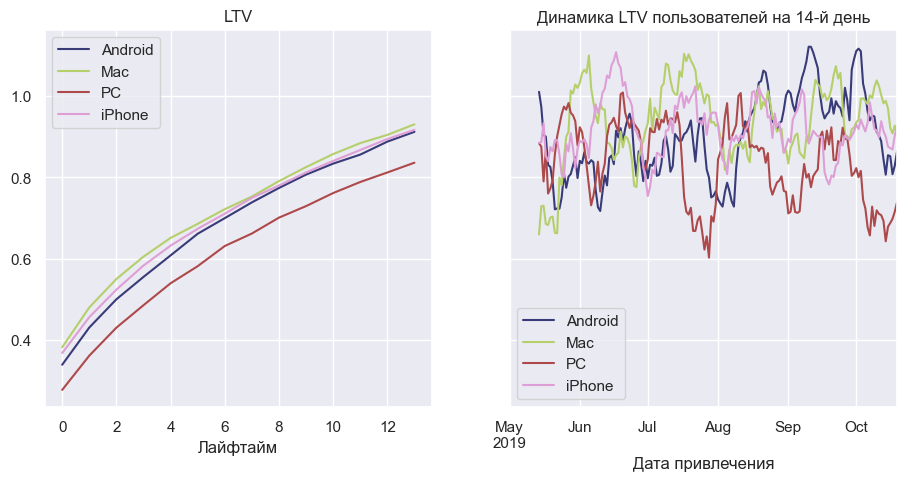

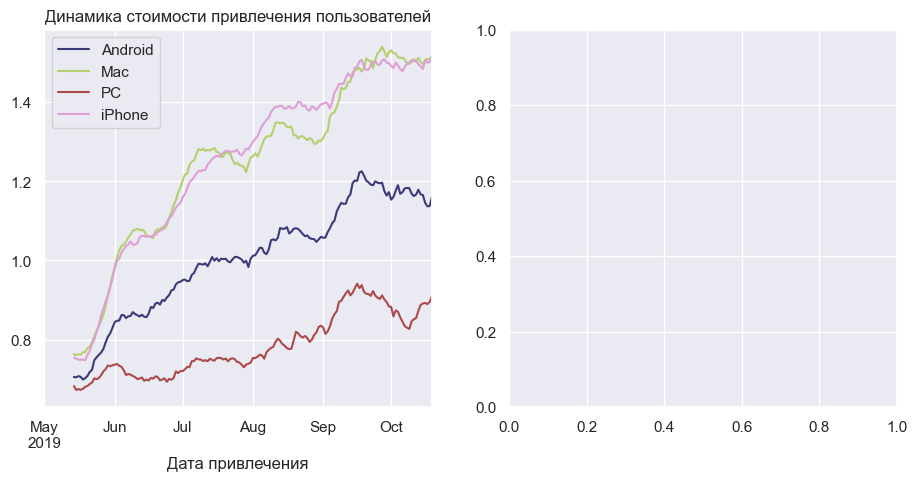

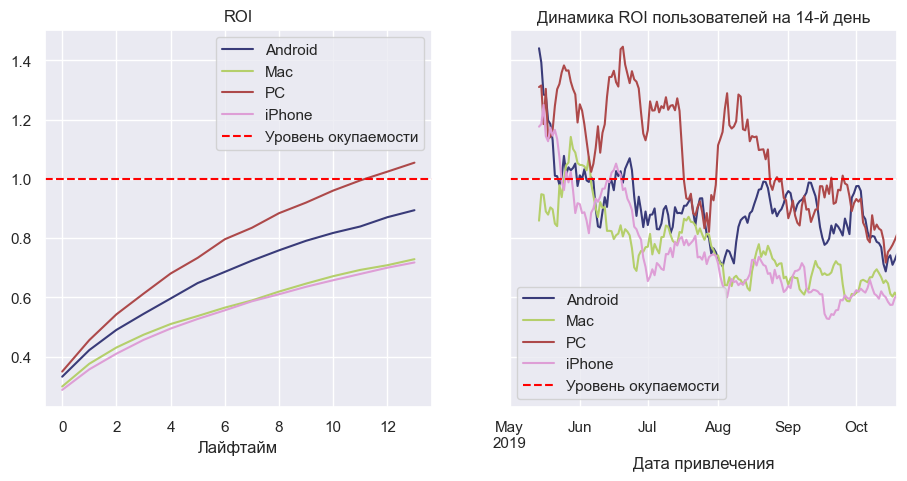

In [61]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Видим, что
* <s> Реклама не окупается для устройств Mac и iPhone; <s>
* Реклама не окупается для устройств Mac, iPhone и Android;
* Стоимость привлечения пользователей для устройств Mac и Apple заметно больше;
* Для Android и PC реклама окупается.

Ранее мы показали, что конверсия пользователей iPhone и Mac выше, чем у остальных устройств. Возможно дело в удержании пользователей. Посчитаем удержание.

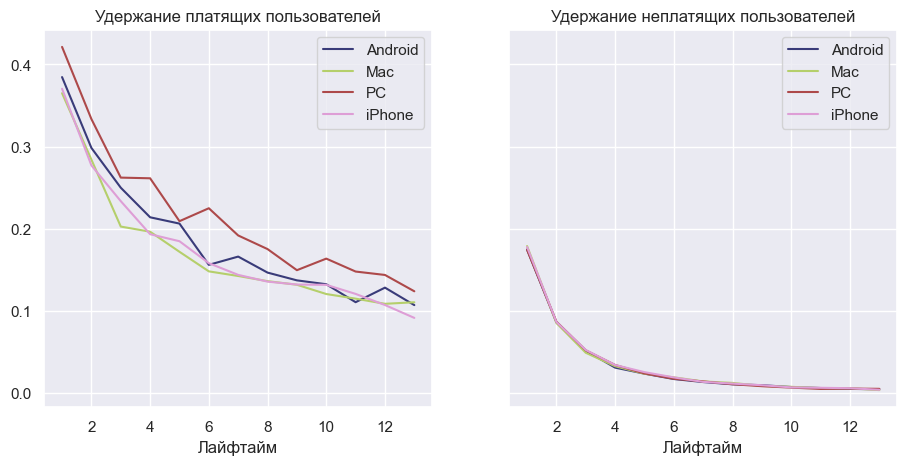

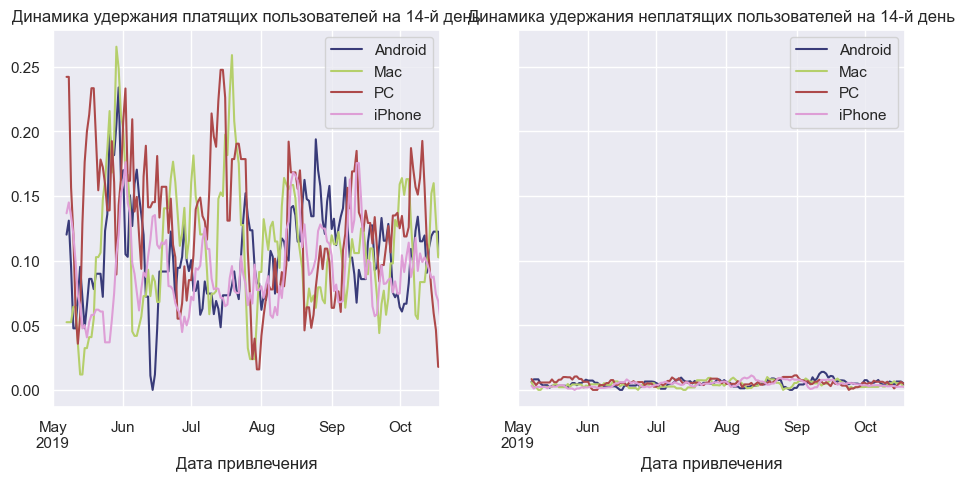

In [62]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    df_profiles, df_visits, observation_date, 14, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, 14) 

Удержание для разных устройств также примерно одинаковое. Скорее всего на небольшой ROI для устройств iPhone и Mac влияет что-то другое.

### Анализ окупаемости рекламы с разбивкой по странам

Воспользуемся функциями подсчета LTV и ROI, но добавим дополнительную разбивку по странам.

In [63]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    df_profiles, df_orders, observation_date, 14, dimensions=['region']
)

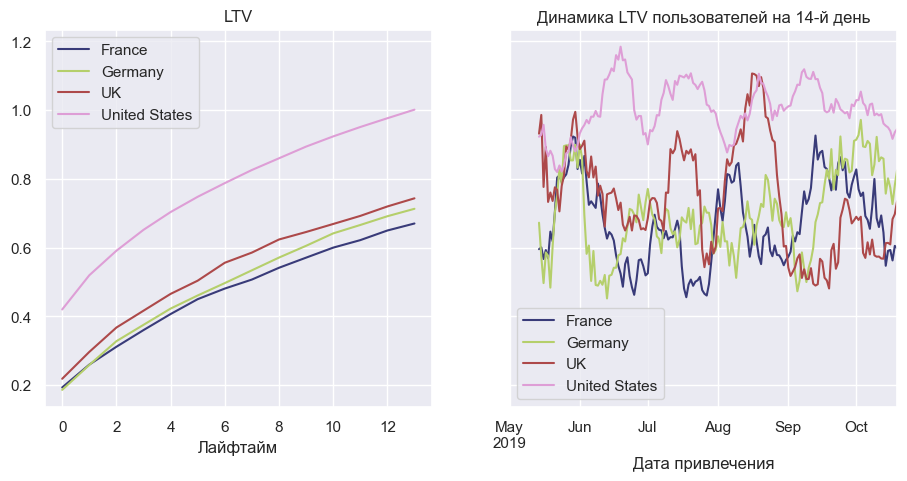

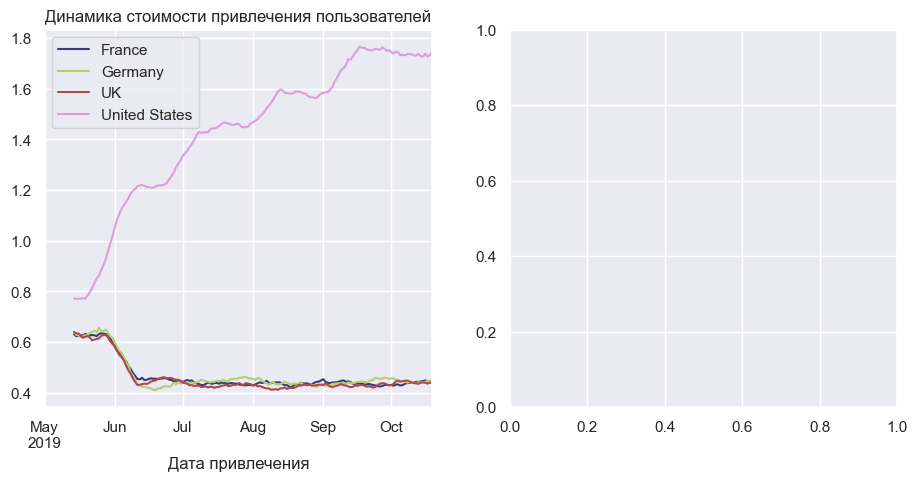

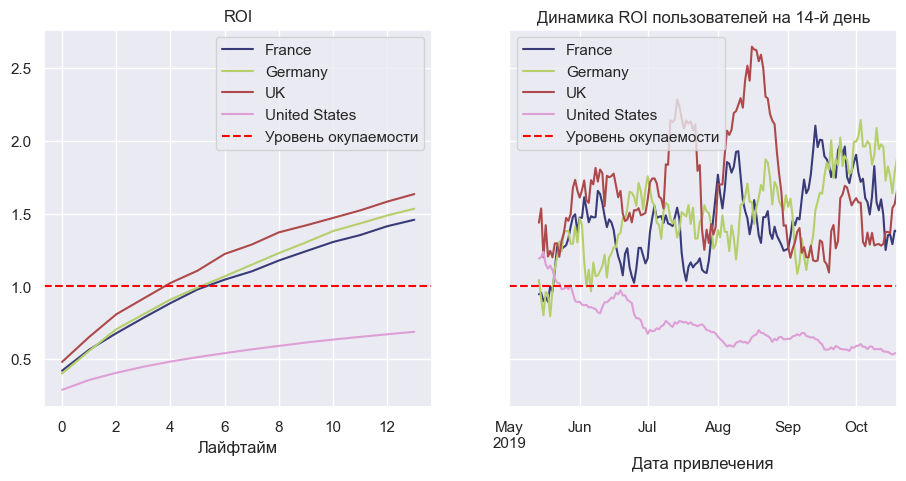

In [64]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Видим, что
* Реклама не окупается только в США;
* Стоимость привлечения пользователей в США растет намного сильнее, в других странах траты на привлечение держатся на одном уровне;
* Видно, что LTV для пользователей из США выше.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

Воспользуемся функциями подсчета LTV и ROI, но добавим дополнительную разбивку по рекламным каналам.

In [65]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    df_profiles, df_orders, observation_date, 14, dimensions=['channel']
)

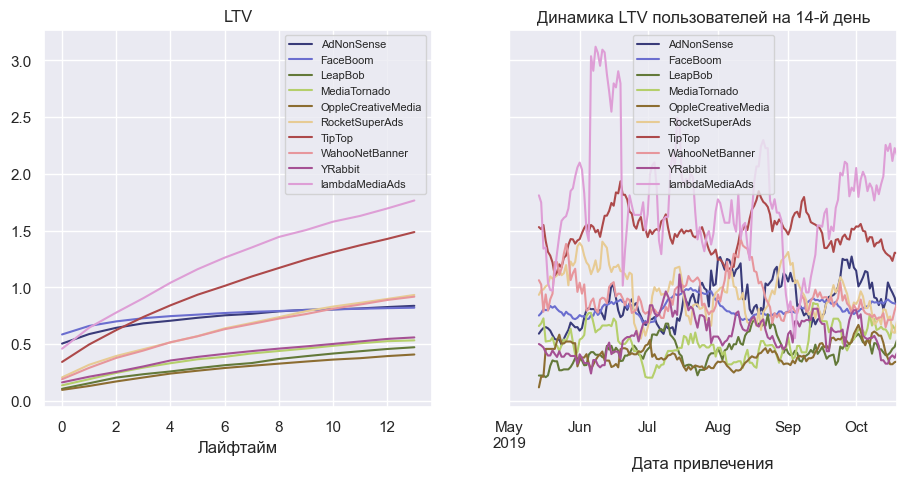

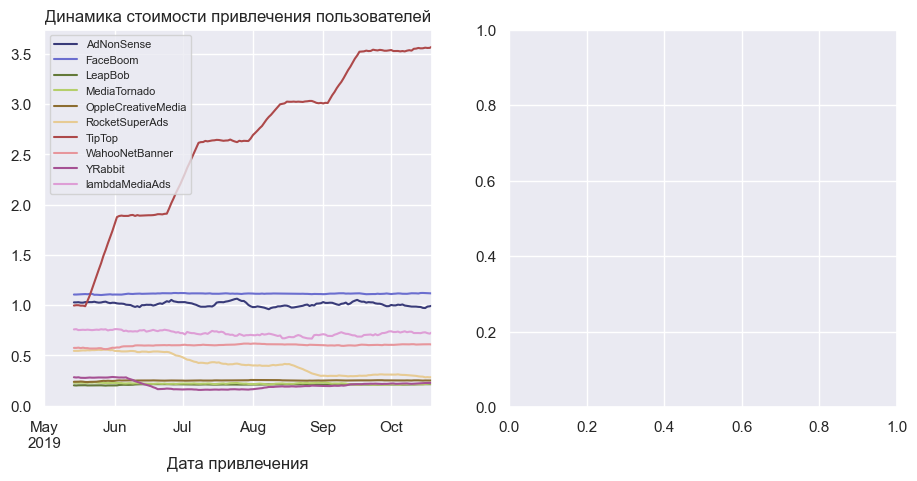

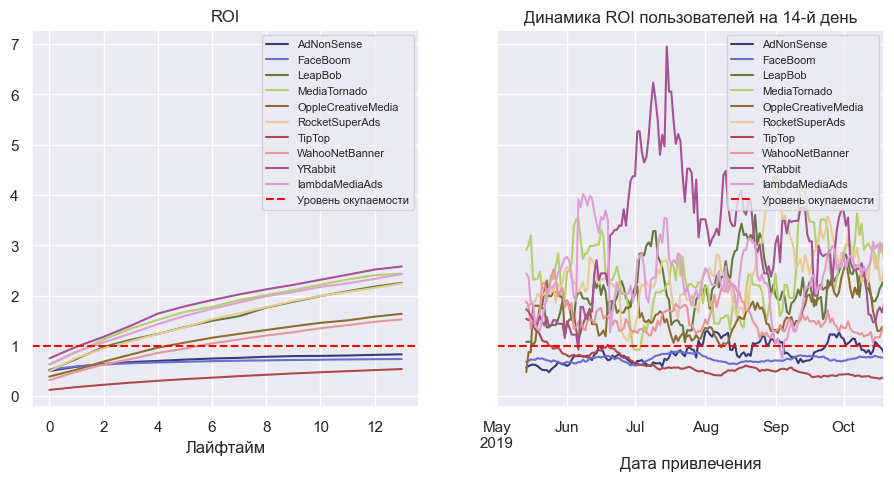

In [66]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14, legend_font=8)

Видим, что
* Реклама не окупается для 3-х каналов привлечения: TipTop, FaceBoom, AdNonSense;
* Как и было показано выше средние расходы на привлечение через канал TipTop являются единственными расходами, которые растут.

Выше мы показывали, что конверсия для каналов TipTop, FaceBoom и AdNonSense выше, чем у остальных каналов. А динамика конверсии не менялась. Видимо это и послужило причиной для увеличения расходов на рекламу.

Также, необходимо будет оценить удержание пользователей по "проблемным" каналам. Возможно проблема в том, что пользователи, привлеченные по этим каналам, не делают покупок после первой.

#### Анализ удержания пользователей с разбивкой по каналам

Чтобы разобраться почему при росте расходов на привлечение пользователей по каналам FaceBoom, TipTop и AdNonSense и достаточно высокой конверсии по ним, имеет смысл посмотреть на удержание пользователей с разбивкой по каналам.

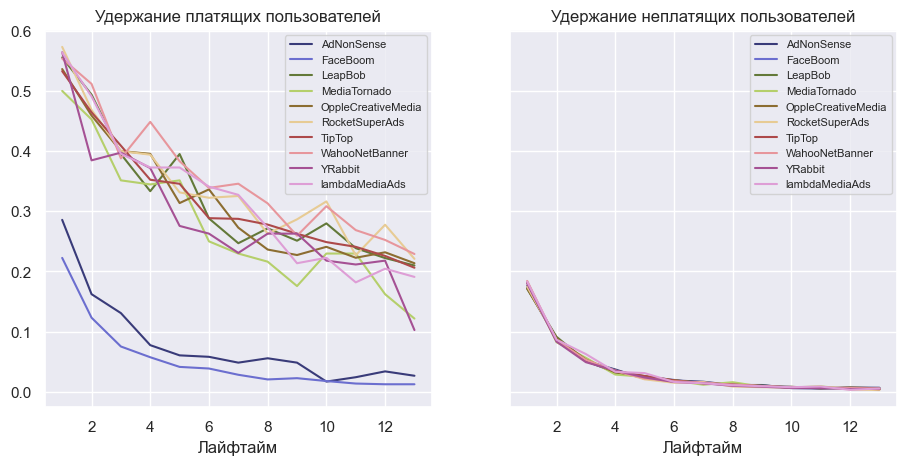

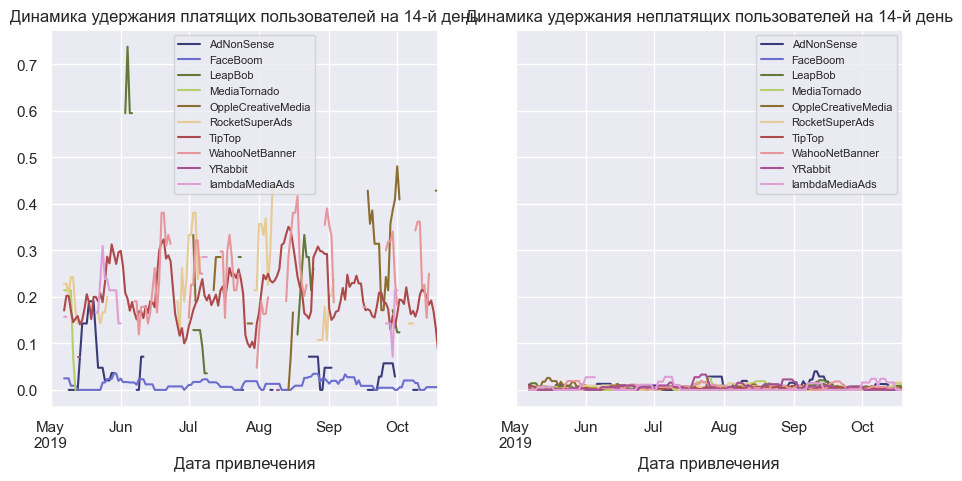

In [67]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    df_profiles, df_visits, observation_date, 14, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, 14, legend_font=8) 

Мы видим, что по двум из трех "проблемных" каналов удержание пользователей заметно ниже остальных. Это означает, что пользователи, пришедшие по этим каналам по какой-то причине не совершают вторую покупку после первой.

### Дополнительный анализ

#### Анализ окупаемости по паре "канал - страна"

Интересно, связана ли неокупаемость по 3-м неокупаемым каналам с тем, что единственной странной с ROI меньше 1 является США. Построим графики LTV и ROI для выборки данных их этих 3-х каналов, но с разбивкой по странам.

In [68]:
profiles_filtered = df_profiles.query('channel == "TipTop" | channel == "FaceBoom" | channel == "AdNonSense"').copy()

In [69]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, df_orders, observation_date, 14, dimensions=['region', 'channel']
)

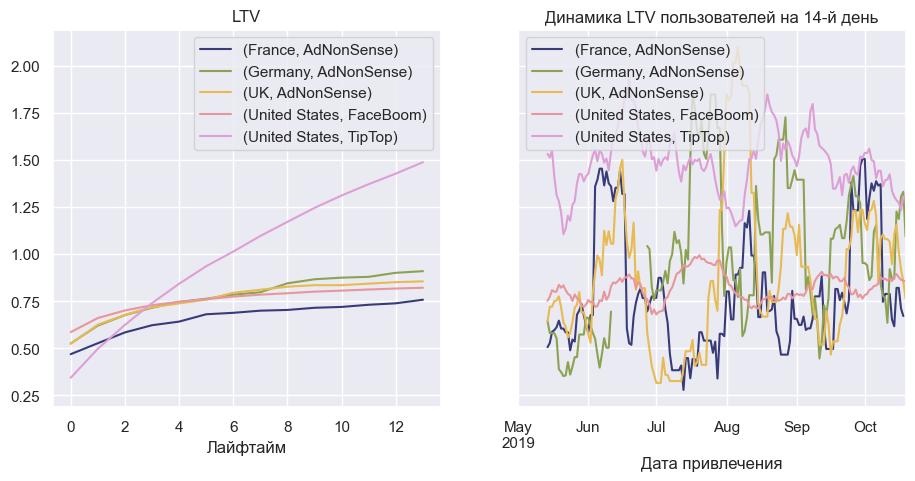

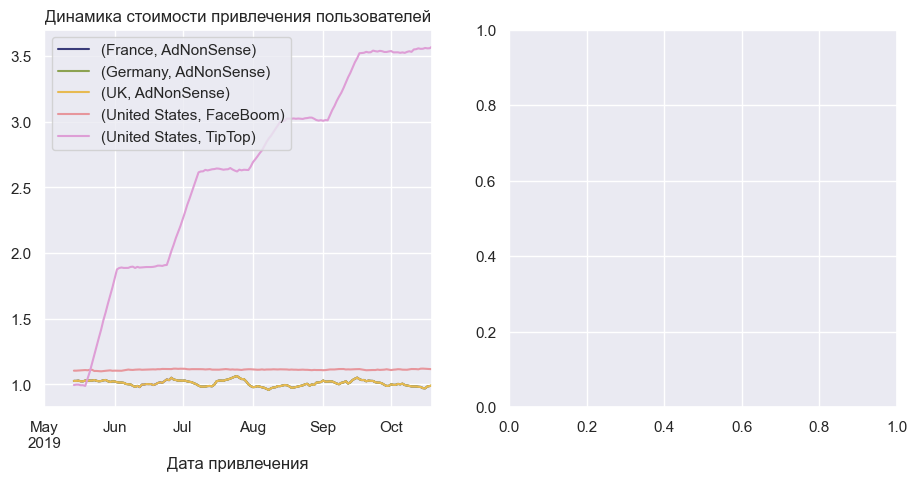

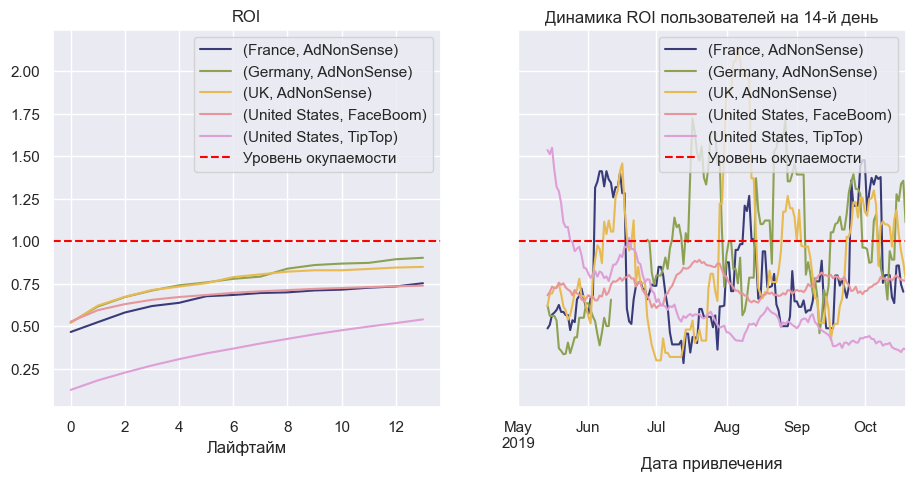

In [70]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Из этих графиков видно, что:
* Каналы привлечения FaceBoom и TipTop используются только в США и затраты на них являются причиной низкого ROI, хотя LTV для пары USA - TipTop выше остальных;
* Канал AdNonSense используется в европейских странах и также снижает ROI для них.

#### Анализ окупаемости по паре "страна - устройство"

~Двумя~ **Тремя** устройствами пользователей с низкими показателями окупаемости рекламы стали **Android**, iPhone и Mac. Возможно это связано с тем, что именно в США этих устройств больше всего. Построим графики окупаемости для пар "страна - устройство", выбра только **Android**, iPhone и Mac. 

In [71]:
profiles_filtered = df_profiles.query('device == "iPhone" | device == "Mac" | device == "Android"').copy()

In [72]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, df_orders, observation_date, 14, dimensions=['region', 'device']
)

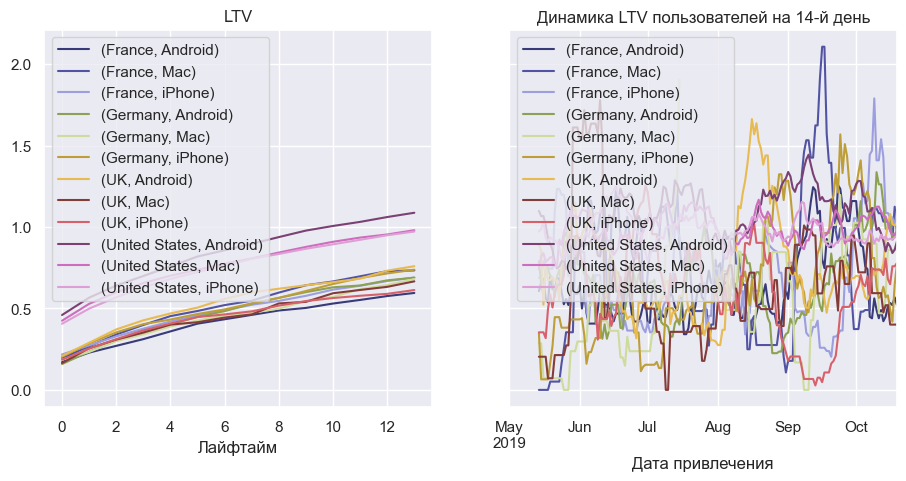

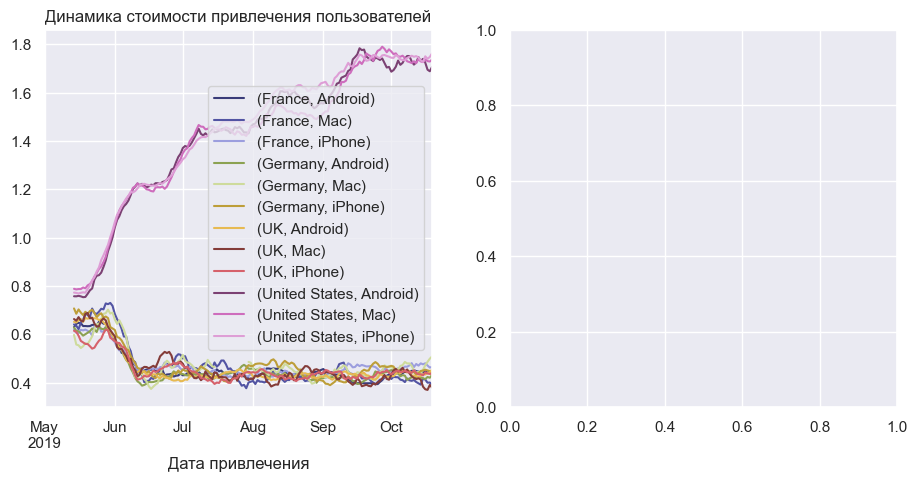

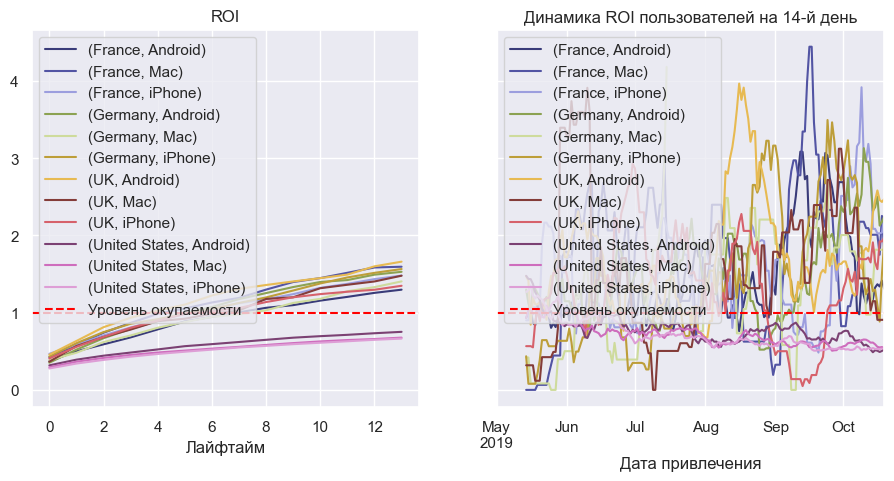

In [73]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=14)

Наша гипотеза подвердилась: низкий ROI для устройств **Android**, Mac и iPhone складывается только для этих устройств из США. Покажем сколько этих устройств для каждой из стран.

In [74]:
profiles_filtered.groupby(by=['region', 'device']).agg({'user_id': 'count'})

user_id
region        device          
France        Android     3313
              Mac         1163
              iPhone      2198
Germany       Android     2849
              Mac         1020
              iPhone      1862
UK            Android     3243
              Mac         1086
              iPhone      2274
United States Android    12436
              Mac        15424
              iPhone     27548

Именно **Android**, iPhone и Mac больше всего в США, поэтому в анализе с разбивкой по устройствам эти устройства были с ROI меньше 1 - т.к. окупаемость в США ниже, чем в других странах.

#### Анализ удержания по странам

Выше мы показали, что только в США ROI меньше 1. И это связано с высокими расходами на рекламу, которая не окупается. Также мы показали, что для самых затратных каналов привлечения, мы имеем очень низкое удержание платящих пользователей. <br> 
Для того, чтобы сделать верные выводы, оценим удержание пользователей по странам.

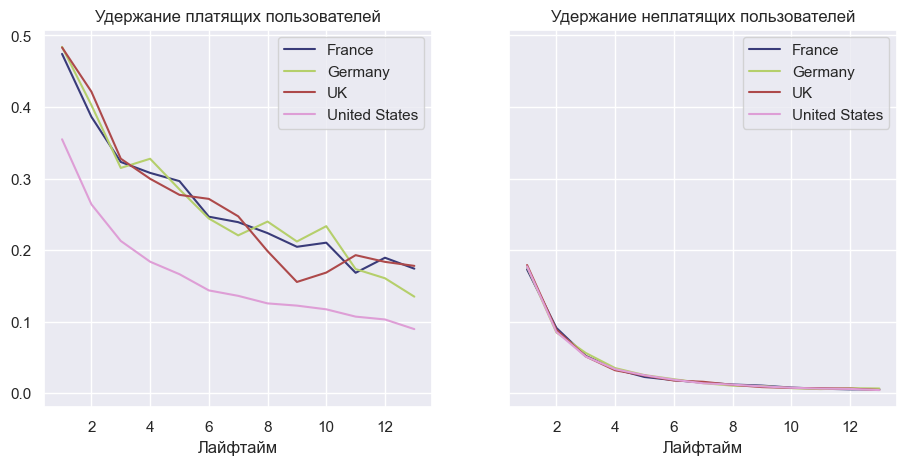

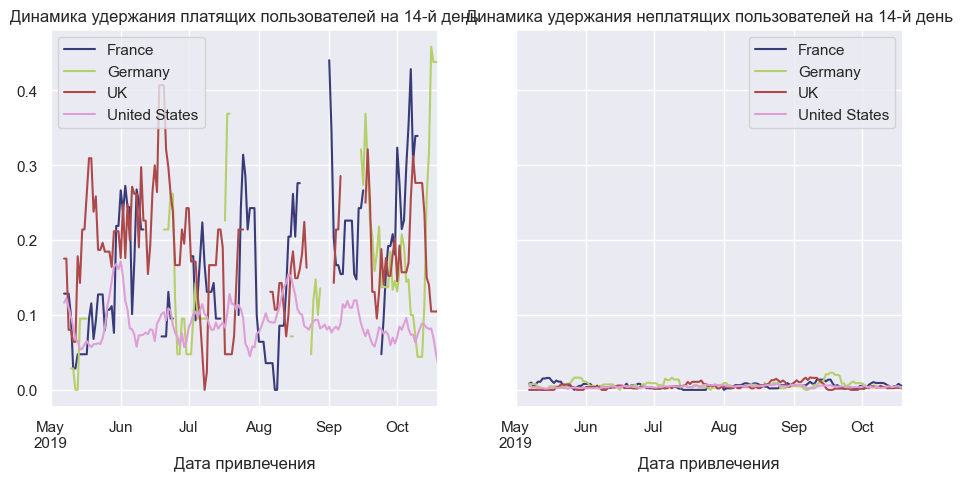

In [75]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    df_profiles, df_visits, observation_date, 14, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, 14) 

Действительно, мы видим низкое удержание по платящим пользователям для пользователей из США, по сравнению с другими странами.

## Общий вывод и рекомендации

В данном проекте мы проанализировали посещения, покупки пользователей приложения и статистику расходов на рекламу с 2019-05-01 по 2019-10-27. Мы смогли показать, что, к сожалению, общий уровень окупаемости приложения ROI не достигает единицы за две недели после привлечения пользователя. <br>
Мы можем перечислить следующие наблюдения, благодаря анализу:
* Основной вклад в окупаемость вносят пользователи из США. Таких пользователей больше всего;
* ROI по другим странам (Англия, Германия, Франция) находится на приемлемом уровне и выходит на уровень больше 1 уже на 4-й день после привлечения пользователей;
* Больше всего расходов на привлечение пользователей было у каналов FaceBoom и TipTop. Оба эти канала привлекали пользователей только из США;
* У пользователей из США самое низкое удержание платящих пользователей - это влияет на низкое ROI - пользователь, за чье привлечение были заплачены деньги не приносит достаточно прибыли. Скорее всего потому что не делает второй заказ;
* Канал привлечения AdNonSense привлекал только пользователей из Европы и для этого канала окупаемость также меньше 1, хотя в него было вложено не так много денег. Удержание платящих пользователей по этому каналу также заметно ниже других каналов;
* Мы смогли показать, что окупаемость для пользователей с устройствами iPhone и Mac также меньше 1, но это связано с тем, что большинство пользователей с этими устройствами именно в США, где на окупаемость влияют затратные каналы привлечения;

Мы показали, что затраты на каналы TipTop и FaceBoom заметно росли в течение всего периода, что повлияло на низкую ROI по этим каналам. Но причины падения ROI для этих каналов разная:
* Для канала TipTop мы видим резкий рост средней стоимости привлечения пользователя: то есть вне зависимости от наших трат на рекламу в этом канале, количество пользователей не росло. В итоге прибыль от этих пользователей не смогла компенсировать траты;
* Для канала FaceBoom средняя стоимость привлечения пользователя была постоянной, т.е вложение денег в этот канал давало пропорциональный рост пользователей, но удержание платящих пользователей от этого канала было слишком низкое. И в итоге прибыль была недостаточной, чтобы маркетинг окупился.

***

В связи с этим, можно выделить следующие рекомендации и точки роста: 
1. Необходимо снизить расходы на канал привлечения TipTop, т.к. вложение в него денег не дает существенного прироста пользователей.
2. Необходимо тщательней изучить причины низкого удержания платящих пользователей для каналов FaceBoom в США и AdNonSense в Европе. Скорее всего причина в акции или скидке, которые предлагают пользователю: они оплачивают контент только в первый раз, но второй раз уже не совершают покупку.
3. Сконцетрировать свое внимание необходимо на пользователях из США, т.к. они составляют основную аудиторию нашего приложения.

Также, возможно стоит обратить внимание на каналы привлечения в достаточно высокой конверсией и высоким удержанием: такими каналами могут быть `RocketSuperAds` и `lambdaMediaAds`

***